# 1. Time Series Data
Time series data is a type of data that is collected over time at regular intervals. It is a sequence of data points that are ordered chronologically and can be used to analyze trends, patterns, and behaviors over time. Time series data can be collected from a variety of sources, such as sensors, financial markets, weather stations, and social media platforms.

Examples of time series data include stock prices, temperature readings, website traffic, and sales data. Time series data can be analyzed using various statistical and machine learning techniques, such as regression analysis, ARIMA models, and deep learning models.

Time series data is often used in forecasting and prediction applications, where the goal is to predict future values based on past observations. Time series analysis can also be used to identify anomalies, trends, and seasonality in the data, which can provide insights into the underlying processes that generate the data.

Overall, time series data is an important type of data that is used in many different fields, including finance, economics, engineering, and social sciences. By analyzing time series data, researchers and practitioners can gain valuable insights into the behavior of complex systems and make informed decisions based on historical patterns and trends.

Time series data is a sequence of data points collected over time that can be used to analyze trends and patterns. It can be collected from various sources and analyzed using statistical and machine learning techniques.

Time series forecasting is the process of predicting future values based on past observations. Time series data is used in many different fields, including finance, economics, engineering, and social sciences.

# Stock Market Data scraping in Python

In [8]:
# pip install plotly
#%pip install scipy
# %pip install statsmodels

In [9]:
# %pip install yfinance

In [10]:
import numpy as np

In [11]:
# imporot libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [12]:
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [13]:
date.today()

datetime.date(2024, 6, 21)

In [14]:
# define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Your data will be between these dates: ", start_date,"and", end_date)

Your data will be between these dates:  2023-06-22 and 2024-06-21


In [15]:
# deifne the ticker
ticker = 'GOOGL'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-22,120.000000,123.239998,118.830002,123.150002,123.008827,26952200
2023-06-23,121.379997,122.790001,121.059998,122.339996,122.199745,34885300
2023-06-26,120.760002,122.000000,118.269997,118.339996,118.204330,33969900
2023-06-27,117.080002,119.080002,116.099998,118.330002,118.194351,39535900
2023-06-28,117.089996,120.389999,116.849998,120.180000,120.042229,27091400


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-06-22 to 2024-06-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [17]:
df.insert(0, "Date", df.index, True)
# df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-22,120.000000,123.239998,118.830002,123.150002,123.008827,26952200
1,2023-06-23,121.379997,122.790001,121.059998,122.339996,122.199745,34885300
2,2023-06-26,120.760002,122.000000,118.269997,118.339996,118.204330,33969900
3,2023-06-27,117.080002,119.080002,116.099998,118.330002,118.194351,39535900
4,2023-06-28,117.089996,120.389999,116.849998,120.180000,120.042229,27091400


In [19]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2023-12-20 11:45:39.442231040,142.058486,143.550478,140.797450,142.259841,142.103197,2.879337e+07
min,2023-06-22 00:00:00,116.290001,117.709999,115.349998,116.449997,116.316498,1.251430e+07
25%,2023-09-20 12:00:00,131.380005,132.610001,129.975006,131.464996,131.314285,2.253375e+07
50%,2023-12-19 00:00:00,137.830002,139.100006,136.479996,137.960007,137.801849,2.622640e+07
75%,2024-03-20 12:00:00,150.050003,151.894997,149.259995,150.720001,150.547218,3.144115e+07
max,2024-06-20 00:00:00,178.250000,180.410004,176.110001,177.850006,177.789993,8.436620e+07
std,NaN,15.784179,15.849892,15.691459,15.840674,15.836425,1.067382e+07


In [20]:
# make a plot on plotly
fig = px.line(df, x='Date', y=df.columns, title='Stock Price')
fig.show()

In [21]:
# select columns
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2023-06-22,123.150002
1,2023-06-23,122.339996
2,2023-06-26,118.339996
3,2023-06-27,118.330002
4,2023-06-28,120.180000


In [22]:
# %pip install nbformat>=4.2.0

In [23]:
# plot the data to see how it looks like using plotly
fig = px.line(df, x='Date', y='Close', title='Google Stock Price')
fig.show()

In [24]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result=adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['Close'])

ADF Statistic: -0.607469
p-value: 0.869285
Fail to reject the null hypothesis. Data is not stationary


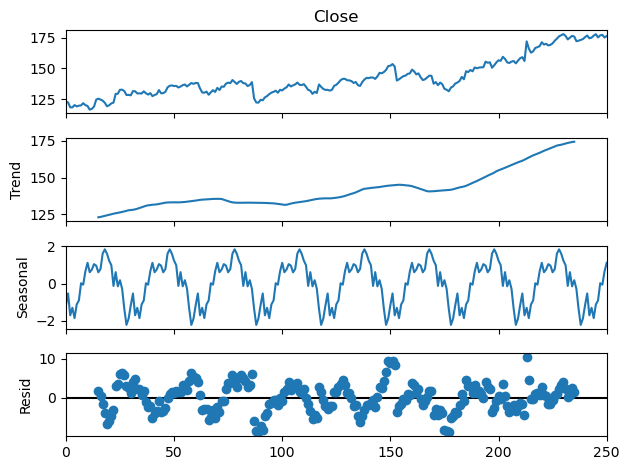

<Figure size 1500x600 with 0 Axes>

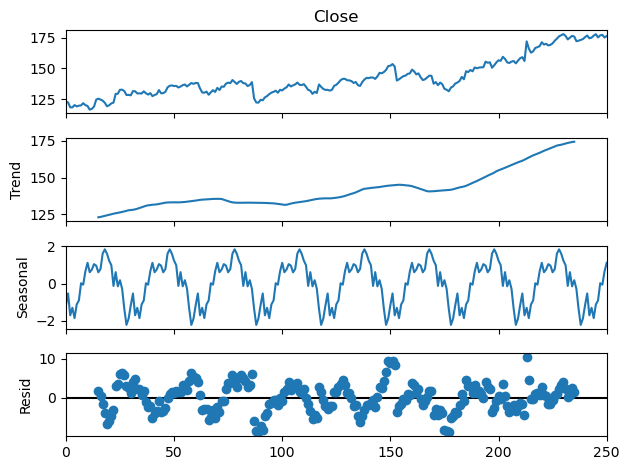

In [25]:
# set the size of figure
plt.figure(figsize=(15,6))

# decompose the data to see the trend, seasonality and noise
decompose=seasonal_decompose(df['Close'],model='additive',period=30)
decompose.plot()

# find the value of d

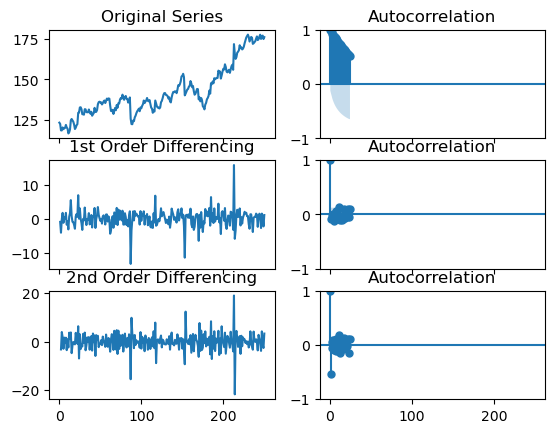

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

"d = 1"
# Lets find p value

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

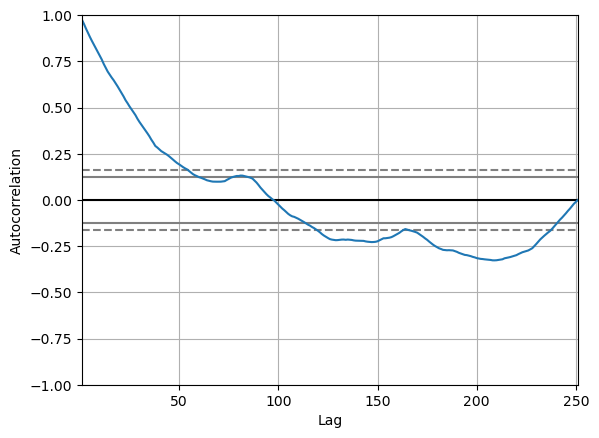

In [27]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['Close'])

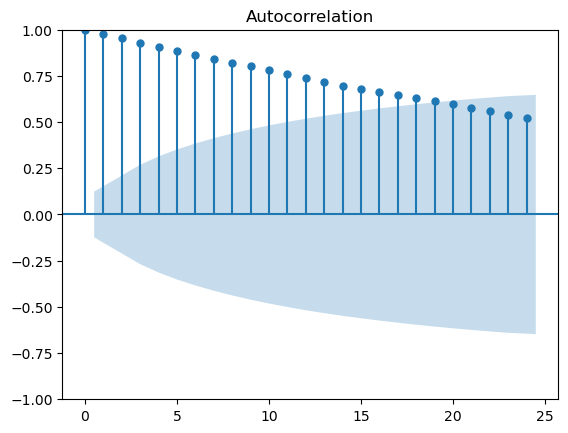

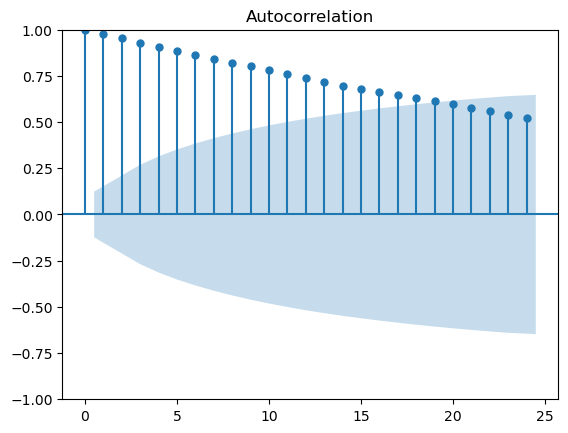

In [28]:
plot_acf(df['Close'], alpha=0.05)

In [29]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close'])) # to get the autocorrelation values, the value of p is taken for which the ouput value is around 95
print(x_acf)

           0
0   1.000000
1   0.975411
2   0.952985
3   0.928241
4   0.905039
5   0.882657
6   0.861207
7   0.841293
8   0.820389
9   0.801709
10  0.780299
11  0.759943
12  0.735864
13  0.714537
14  0.694517
15  0.678053
16  0.662247
17  0.647776
18  0.631226
19  0.614332
20  0.596487
21  0.578272
22  0.560051
23  0.539613


"p = 2"

# Lets find q value

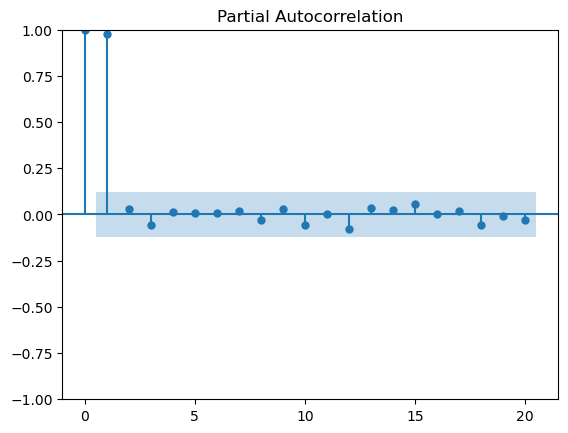

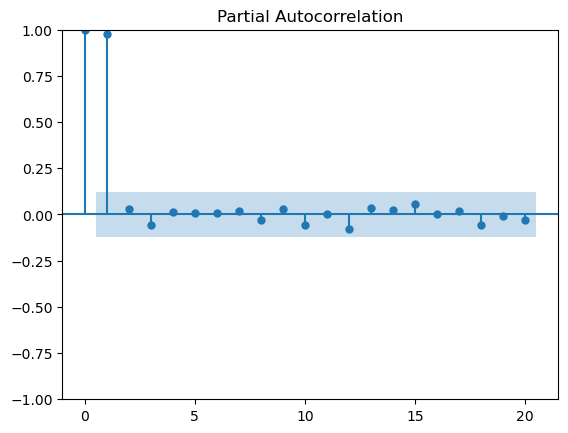

In [30]:
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'], lags=20, alpha=0.05) 

q=2

# lets define p, d, q
p = 2,
d = 1,
q = 2

In [31]:
# %pip install pmdarima

In [32]:
# %pip install --upgrade --force-reinstall numpy

In [33]:
from pmdarima.arima import auto_arima

In [38]:
# lets run arima with pmdarima
model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1305.444, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1211.361, Time=0.44 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1303.680, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1205.139, Time=0.37 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1204.833, Time=0.20 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1211.178, Time=0.15 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.41 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1204.932, Time=0.26 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=2.42 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1206.832, T

In [39]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -599.417
Date:                            Fri, 21 Jun 2024   AIC                           1204.833
Time:                                    21:42:26   BIC                           1215.250
Sample:                                         0   HQIC                          1209.032
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6984      0.051    -13.605      0.000      -0.799      -0.598
ar.S.L24      -0.1903      0.048   

In [42]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2
model = ARIMA(df['Close'], order=(p,d,q))
model=model.fit()
print(model.summary())

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -582.382
Date:                Sat, 22 Jun 2024   AIC                           1174.764
Time:                        14:32:01   BIC                           1192.372
Sample:                             0   HQIC                          1181.851
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1382      1.073      0.129      0.898      -1.965       2.241
ar.L2          0.5196      0.696      0.747      0.455      -0.844       1.884
ma.L1         -0.2231      1.079     -0.207      0.8

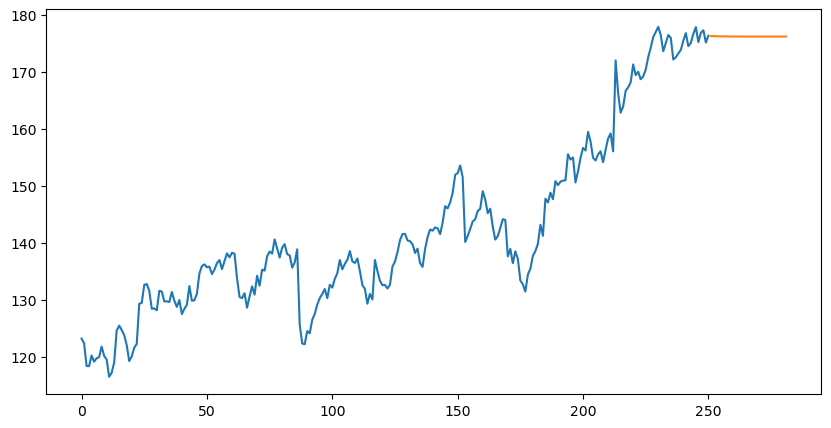

In [45]:
# predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
# print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

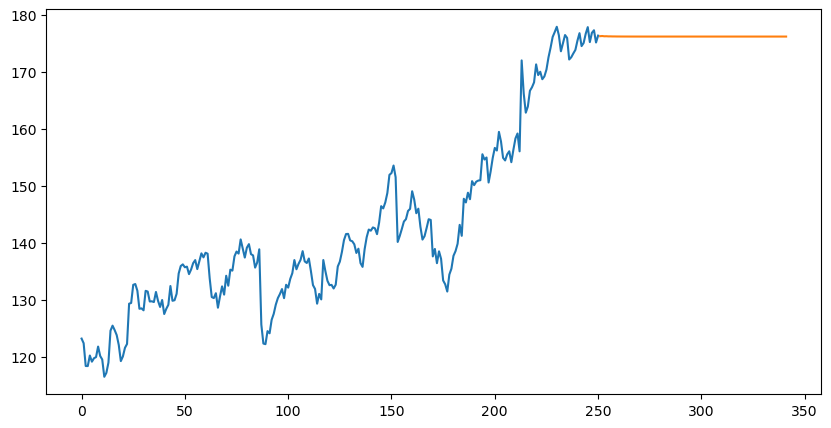

In [46]:
# for 90 days
# predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+90)
# print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

## SARIMA

In [47]:
# let's run SARIMA
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

In [48]:
p , d, q = 2, 1, 2

In [50]:
model=SARIMAX(df['Close'],
               order=(p,d,q), 
               seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -569.471
Date:                            Sat, 22 Jun 2024   AIC                           1156.942
Time:                                    14:42:56   BIC                           1188.192
Sample:                                         0   HQIC                          1169.536
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1422      1.822      0.078      0.938      -3.428       3.712
ar.L2          0.5337      1.365   

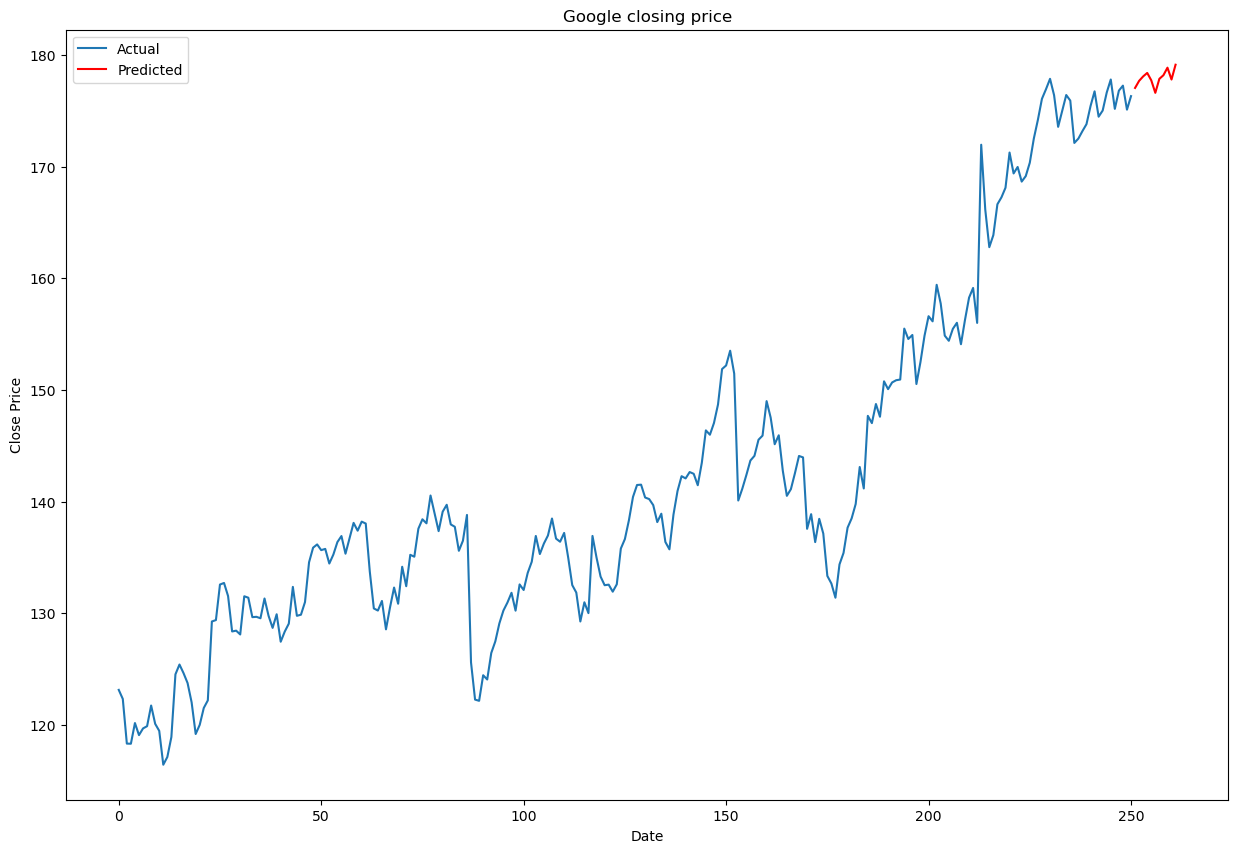

In [51]:
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)
# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

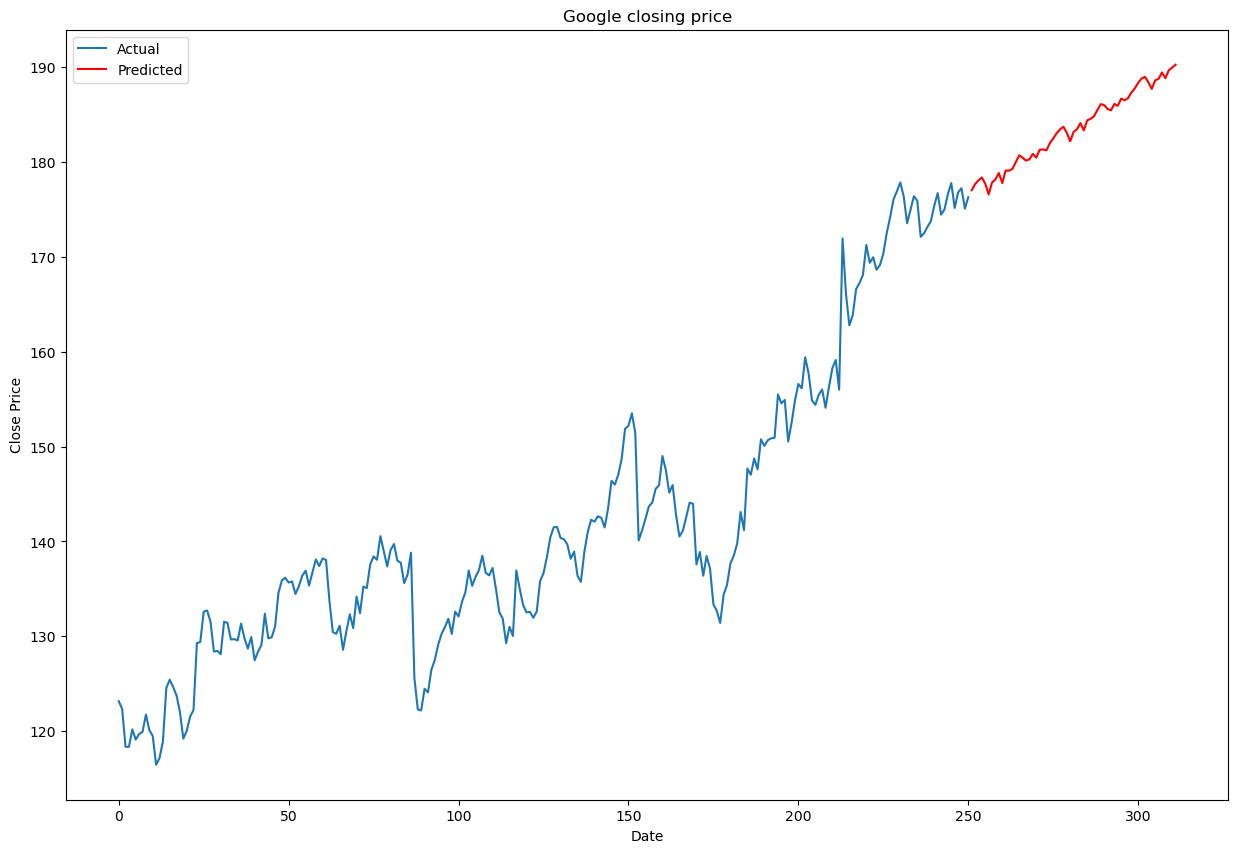

In [52]:
# run it for 60 days

predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+60)
# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



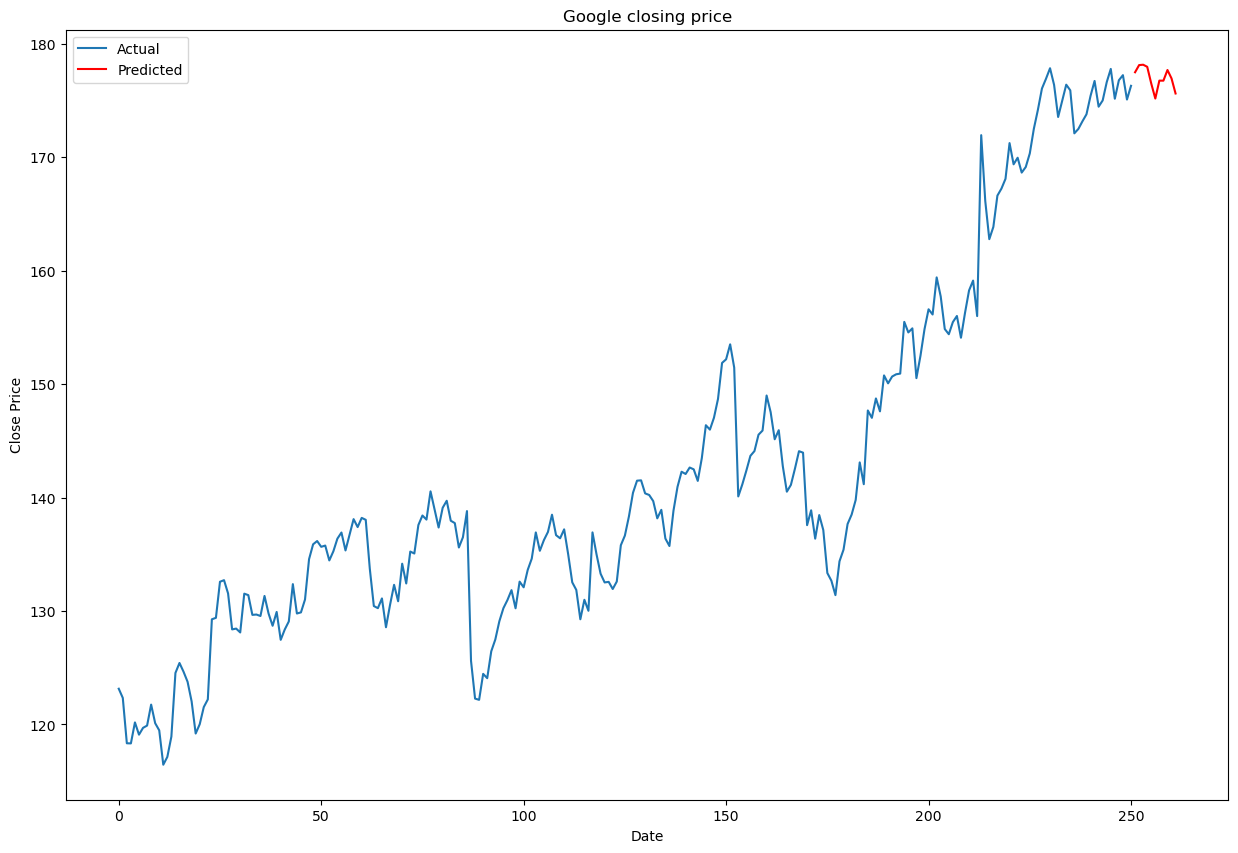

In [53]:
# lets update p, d, q
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 3, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

# hyper paramter tuning

In [54]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

In [64]:
# Assume you have a DataFrame 'df' with your time series data in a column named 'value'
# Assume that the seasonal period of your time series data is 12 (e.g., monthly data)

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, d, q and m quadruplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = SARIMAX(df['Close'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 enforce_stationarity=True,
                                 enforce_invertibility=True)
            results = temp_model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue
        print("Best SARIMA{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMA(0, 0, 0)x(0, 0, 0, 12)12 model - AIC:3206.13081705352
Best SARIMA(0, 0, 0)x(0, 0, 1, 12)12 model - AIC:2918.266213546809
Best SARIMA(0, 0, 0)x(0, 1, 0, 12)12 model - AIC:1644.9916489078576
Best SARIMA(0, 0, 0)x(0, 1, 1, 12)12 model - AIC:1643.20417818054


c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Best SARIMA(0, 0, 0)x(0, 1, 1, 12)12 model - AIC:1643.20417818054


c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Best SARIMA(0, 0, 0)x(0, 1, 1, 12)12 model - AIC:1643.20417818054
Best SARIMA(0, 0, 0)x(1, 1, 0, 12)12 model - AIC:1641.2129678888903
Best SARIMA(0, 0, 0)x(1, 1, 1, 12)12 model - AIC:1634.1461557248529
Best SARIMA(0, 0, 0)x(1, 1, 1, 12)12 model - AIC:1634.1461557248529
Best SARIMA(0, 0, 0)x(1, 1, 1, 12)12 model - AIC:1634.1461557248529
Best SARIMA(0, 0, 1)x(0, 1, 0, 12)12 model - AIC:1478.4878455730309
Best SARIMA(0, 0, 1)x(0, 1, 1, 12)12 model - AIC:1466.1091114591434


c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Best SARIMA(0, 0, 1)x(0, 1, 1, 12)12 model - AIC:1466.1091114591434


c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Best SARIMA(0, 0, 1)x(0, 1, 1, 12)12 model - AIC:1466.1091114591434
Best SARIMA(0, 0, 1)x(1, 1, 0, 12)12 model - AIC:1458.9269614666518
Best SARIMA(0, 0, 1)x(1, 1, 1, 12)12 model - AIC:1453.539896375208
Best SARIMA(0, 1, 0)x(0, 0, 0, 12)12 model - AIC:1169.3836794107342
Best SARIMA(0, 1, 0)x(0, 0, 0, 12)12 model - AIC:1169.3836794107342
Best SARIMA(0, 1, 0)x(0, 0, 0, 12)12 model - AIC:1169.3836794107342
Best SARIMA(0, 1, 0)x(0, 1, 1, 12)12 model - AIC:1153.7724795233764
Best SARIMA(0, 1, 0)x(0, 1, 1, 12)12 model - AIC:1153.7724795233764
Best SARIMA(0, 1, 0)x(0, 1, 1, 12)12 model - AIC:1153.7724795233764
Best SARIMA(0, 1, 0)x(0, 1, 1, 12)12 model - AIC:1153.7724795233764
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435


c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435


c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435


c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435


c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435


c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC

c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435
Best SARIMA(0, 1, 0)x(1, 1, 1, 12)12 model - AIC:1153.7189898153435


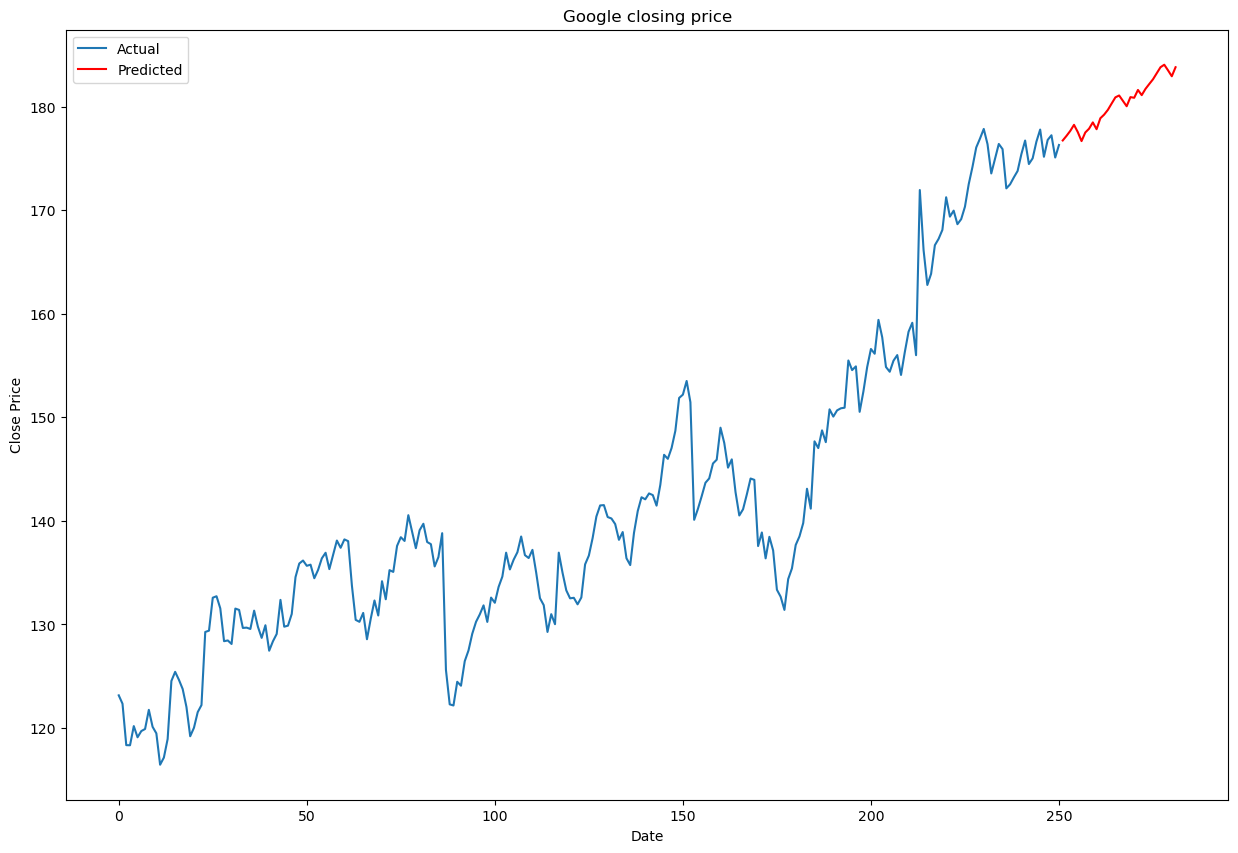

In [65]:
# predict next 30 days
model = SARIMAX(df['Close'],
                order = best_pdq,
                seasonal_order = best_seasonal_pdq,
                enforce_stationarity=False,
                enforce_invertibility=False)
model = model.fit()
predictions = model.predict(len(df['Close']), len(df['Close'])+30)
# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Close   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -543.711
Date:                              Sat, 22 Jun 2024   AIC                           1093.423
Time:                                      15:00:01   BIC                           1103.671
Sample:                                           0   HQIC                          1097.559
                                              - 251                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1420      0.078     -1.831      0.067      -0.294       0.010
ma.S.L12      -1.0000    632.945     -0.002      0.999   -1241.549    1239.549
sigma2         6.2903   3981.604      0.002      0.999   -7797.510    7810.090
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               835.31
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             0.11
Prob(H) (two-sided):                  0.17   Kurtosis:                        12.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""